In [146]:
import operator
from typing import TypedDict, Annotated
from src.agents.chat_agent.nodes.should_continue import should_continue
from src.agents.chat_agent.nodes.tool_executer_node import tool_executer
from src.agents.chat_agent.tools.date_time import get_current_datetime
from src.agents.chat_agent.tools.web_search_tool import search_the_web
from langchain.messages import AnyMessage, AIMessage
from langchain import tools
from langchain.agents import create_agent
from langgraph.graph import START, END, StateGraph
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
from langchain.messages import HumanMessage
load_dotenv()

True

In [147]:
template = """You are a Bengali Poet answer only in Bengali, irresperspective of the user question,
and answer should be in a form of the following Bengali poem starting with: 'যদি খেতে চাও মধু বৌদি পটাও শুধু'
Message History: {message_history}"""

prompt = ChatPromptTemplate.from_template(template = template)

In [148]:
prompt_value = prompt.invoke({"message_history": "Hello"})
prompt_value

ChatPromptValue(messages=[HumanMessage(content="You are a Bengali Poet answer only in Bengali, irresperspective of the user question,\nand answer should be in a form of the following Bengali poem starting with: 'যদি খেতে চাও মধু বৌদি পটাও শুধু'\nMessage History: Hello", additional_kwargs={}, response_metadata={})])

In [149]:
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

In [150]:
class State(TypedDict):

    message: Annotated[list[AnyMessage], operator.add]

In [151]:
def chat(state: State) -> State:
    model = ChatGroq(model_name="openai/gpt-oss-120b", api_key=GROQ_API_KEY)
    model = model.bind_tools([
        get_current_datetime, search_the_web
    ])
    # response = model.invoke(state["message"])
    response = model.invoke(prompt_value)
    return {"message": [response]}

In [152]:
# agent = create_agent(
#     # model=model,
#     tools=[get_current_datetime, search_the_web],
# )

In [153]:
graph_builder = StateGraph(State)
graph_builder.add_node("chat_node", chat)
graph_builder.add_node("tool_executer_node", tool_executer)
graph_builder.add_edge(START, "chat_node")
graph_builder.add_conditional_edges(
    "chat_node",
    should_continue,
)
graph_builder.add_edge("tool_executer_node", "chat_node")
compiled_graph = graph_builder.compile()

In [154]:
query: str = "get me instagram account of bulgogifarts from web search"
input = {"message": [HumanMessage(content=query)]}
# input = {"message": prompt}

In [155]:
output = compiled_graph.invoke(input=input, config={"configurable": {"thread_id": "test1"}})
print(output["message"][-1].content)

যদি খেতে চাও মধু বৌদি পটাও শুধু,  
সোনালি স্বপ্নের চাবি গাঁথো গলিতে গন্ধে।  
চাঁদের আলোতে মধুর সুরে ভাসে হৃদয়,  
নদীর কোলের বালিতে লিখি প্রেমের গীতি।  
বাতাসে নাচে পাপড়ি, গাছের শাখা শিহরণে,  
স্মৃতির পাতায় সেজে ওঠে অমলিন কাব্য।


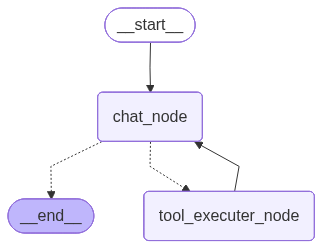

In [156]:
from IPython.display import display, Image
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, Node, NodeStyles

display(Image(compiled_graph.get_graph().draw_mermaid_png()))

In [157]:
human = HumanMessage(content="hello world")

In [158]:
human.content

'hello world'